<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%B0%91%EC%8B%9C%EB%94%A5__4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 출력층의 소프트맥스 함수 출력 값, 0~9까지 각 숫자에 대한 확률 벡터, 60% 확률로 "2"를 추정
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 인덱스의 값으로 숫자의 값을 표시, 예에서는 인덱스 2에 값이 1이므로 해당하는 레이블의 숫자는 "2"

# 평균 제곱 오차 코드
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

mean_squared_error(np.array(y), np.array(t)) #MSE:0.09750000000000003 [정답]


y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 60% 확률로 "7"를 추정
mean_squared_error(np.array(y), np.array(t)) #MSE: 0.5975

# 평균 제곱 오차를 기준으로 첫 번째 추정 결과가 오차(0.0975)가 두 번째 오차(0.5975)보다 작으니 정답에 더 가까울 것이라 판단 가능.

0.5975

In [ ]:
# 교차 엔트로피(CEE, cross entropy error, CEE) 오차
def cross_entropy_error(y, t):
    n = len(t)
    cee = -(1/n) * np.sum(t * np.log(y) + (1 - t) * np.log(1 - y))
    return cee

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 출력층의 소프트맥스 함수 출력 값, 0~9까지 각 숫자에 대한 확률 벡터, 60% 확률로 "2"를 추정
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 인덱스의 값으로 숫자의 값을 표시, 예에서는 인덱스 2에 값이 1이므로 해당하는 레이블의 숫자는 "2"

cross_entropy_error(np.array(y), np.array(t)) # 오류 발생, divide by zero encountered in log

<ipython-input-5-711e2e789f58>:4: RuntimeWarning: divide by zero encountered in log
  cee = -(1/n) * np.sum(t * np.log(y) + (1 - t) * np.log(1 - y))
<ipython-input-5-711e2e789f58>:4: RuntimeWarning: invalid value encountered in multiply
  cee = -(1/n) * np.sum(t * np.log(y) + (1 - t) * np.log(1 - y))


nan

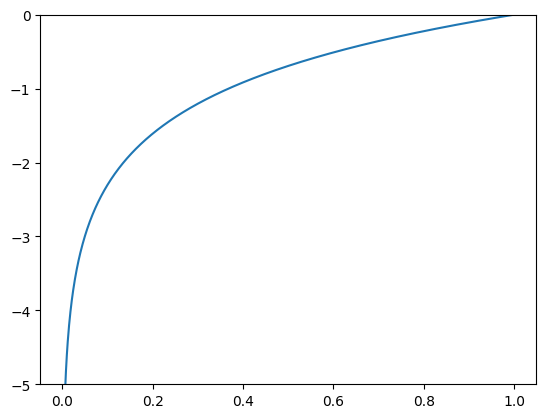

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.show()



In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 인덱스 2에 값이 1이므로 해당하는 레이블의 숫자는 "2"

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 60% 확률로 "2"를 추정
cross_entropy_error(np.array(y), np.array(t)) # 0.510825457099338 [정답]

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 60% 확률로 "7"를 추정
cross_entropy_error(np.array(y), np.array(t)) # 2.302584092994546

2.302584092994546

In [3]:
# 4.2.3
# 미니배치(전체 훈련 데이터의 대표로서 무작위로 선택한 작은 덩어리) 학습
# 훈련 데이터 모두에 대한 손실함수의 평균을 구함
# 교차 엔트로피 오차(훈련 데이터 모두에 대한) 수식

import sys, os
sys.path.append('./dataset')
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax
import time

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000, 10)

train_size = x_train.shape[0] # 60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 무작위로 10개 선택
#print(batch_mask)
x_batch = x_train[batch_mask]
x_batch
t_batch = t_train[batch_mask]
t_batch

# 미니배치의 손실 함수로 일부 표본 데이터를 가지고 전체를 예측


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

x:5
d:0.1999999999990898
x:5
d*x:0.999999999995449
f(x):0.75
-0.24999999999544897
<function tangent_line.<locals>.<lambda> at 0x78e354365630>


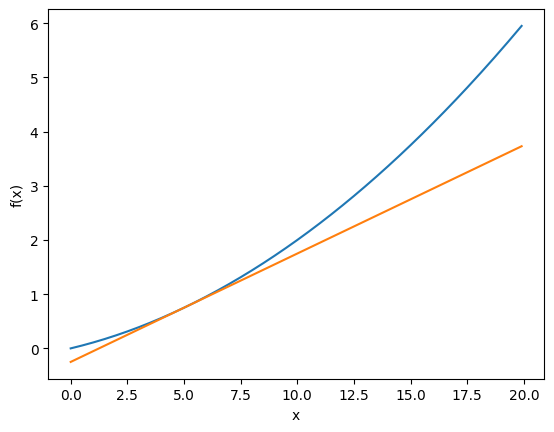

In [4]:
#4.3
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(f'x:{x}')
    print(f'd:{d}')
    y = f(x) - d*x
    print(f'x:{x}')
    print(f'd*x:{d*x}')
    print(f'f(x):{f(x)}')
    print(y)
    k = lambda t: d*t + y
    print(k)
    return k

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
#print(y)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

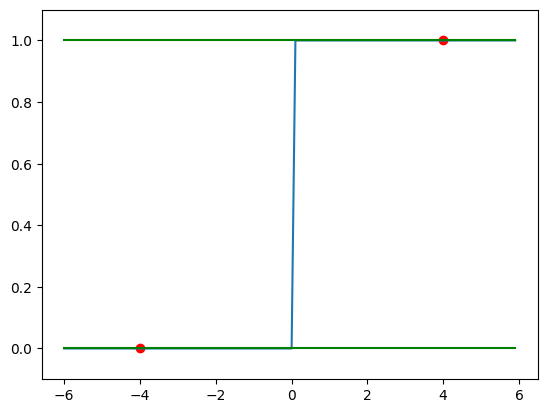

In [6]:
# 그림 4-4 계단함수와 시그모이드 함수: 계단 함수는 대부분의 장소에서 기울기가 0이지만, 시그모이드 함수의 기울기(접선)는 0이 아니다.
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-6.0, 6.0, 0.1)
y1 = step_function(x)
y2 = np.array([1 for _ in range(x.size)])
y3 = np.array([0 for _ in range(x.size)])
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[1,0],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

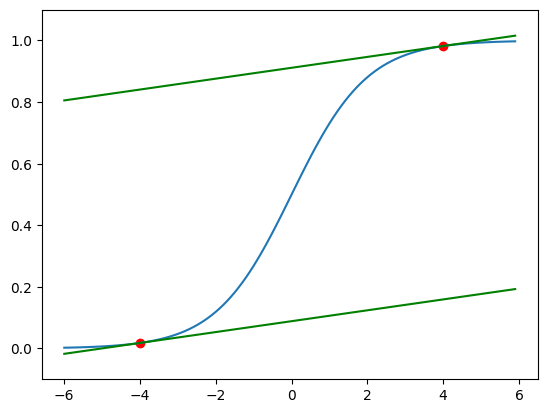

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

def 시그모이드_접선(x): # 접선 ax+b에서 a,b 값을 리턴
    return sigmoid_diff(x), sigmoid(x) - sigmoid_diff(x) * x

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = 시그모이드_접선(4)
y2 = a2 * x + b2
a3, b3 = 시그모이드_접선(-4)
y3 = a3 * x + b3
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[a2*4+b2,a3*-4+b3],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

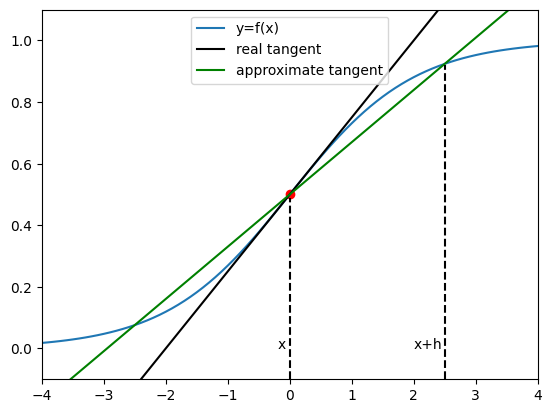

In [11]:
# 그림 4-5 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.
# -*- coding: utf-8 -*-
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = 시그모이드_접선(0)
y2 = a2 * x + b2
a3 = (sigmoid(2.5) - sigmoid(0)) / 2.5
y3 = a3 * x + b2

plt.plot(x, y1, label='y=f(x)')
plt.plot(x, y2, color='black', label='real tangent')
plt.plot(x, y3, color='green', label='approximate tangent')
xv = np.arange(-0.1, 0.5, 0.01)
plt.text(-0.2,0,"x")
plt.plot(np.array([0 for _ in range(xv.size)]), xv, 'k--')
xhv = np.arange(-0.1, sigmoid(2.5), 0.01)
plt.text(2,0,"x+h")
plt.plot(np.array([2.5 for _ in range(xhv.size)]), xhv, 'k--')
plt.scatter([0],[b2],color='red')

plt.ylim(-0.1,1.1)
plt.xlim(-4,4)
plt.legend(loc='upper center')
plt.show()

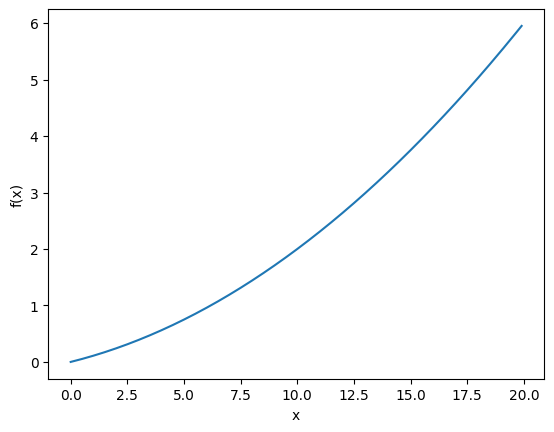

In [12]:
# 그림 4-6 식 f(x)=0.01x**2 + 0.1x 그래프
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [13]:
numerical_diff(function_1, 5)

0.1999999999990898

In [14]:
numerical_diff(function_1, 10)

0.2999999999986347

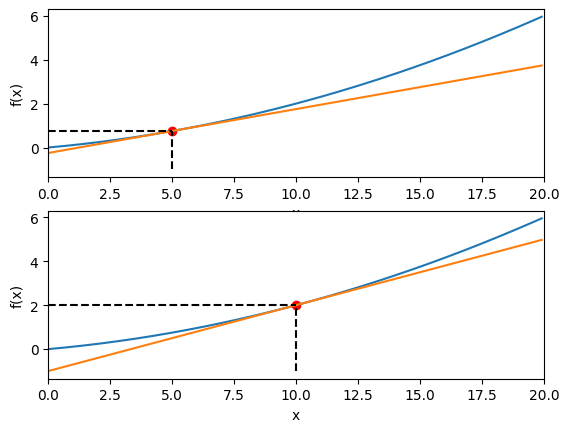

In [15]:
# 그림 4-7 x=5, x=10에서의 접선: 직선의 기울기는 수치 미분에서 구한 값을 사용하였다.
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_1d.py 소스 참고

def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

def draw(ax, x, y, line, tox, toy):
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.plot(x, y)
    ax.plot(x, line)
    h = np.arange(0, tox, 0.01)
    v = np.arange(-1, toy, 0.01)
    ax.plot(np.array([tox for _ in range(v.size)]), v, 'k--')
    ax.plot(h, np.array([toy for _ in range(h.size)]), 'k--')
    ax.scatter(tox,toy,color='red')
    ax.set_xlim([0,20])

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)
tf = tangent_line(function_1, 10)
y3 = tf(x)

f, (ax1, ax2) = plt.subplots(2, 1)
draw(ax1, x, y, y2, 5, function_1(5))
draw(ax2, x, y, y3, 10, function_1(10))

In [17]:
# 그림 4-8 f(x0, x1) = x0**2 + x1**2 그래프
# 3차원 참고주소: https://www.datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

<Figure size 640x480 with 0 Axes>

0.1999999999990898


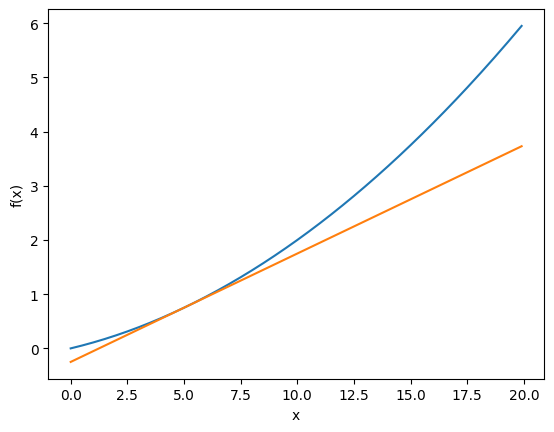

In [21]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x # 접선의 y절편을 구하기 위해 f(x)에서 기울기 d에 x를 곱한 값을 뺍니다.
    return lambda t: d*t + y # 접선의 방적식을 반환

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


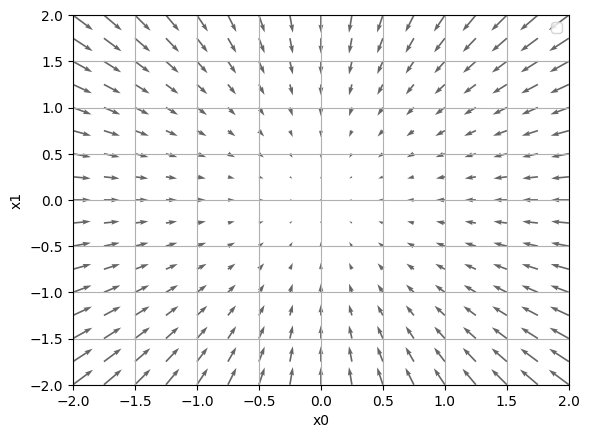

In [22]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


In [23]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [24]:
_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))


array([0., 4.])

In [25]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 0.0]))

array([6., 0.])

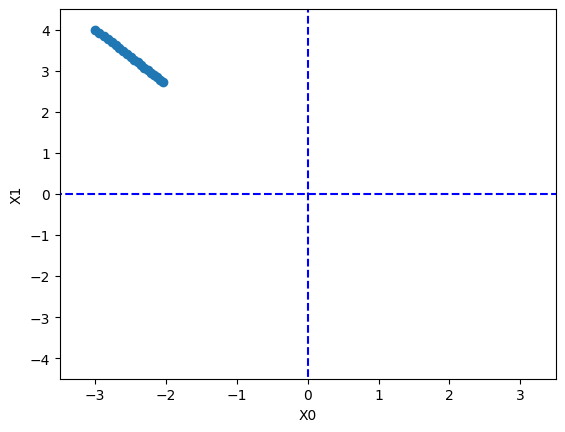

In [38]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

#lr = 0.1
#lr = 1 # 학습률이 너무 큰 예 : lr=1
lr=1e-2 # 학습률이 너무 작은 예 : lr=1e-2
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [40]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/common/gradient.py 소스 참고
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [43]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 0.0315881   0.25605718  0.05667602]
 [-0.79425408  0.72539197  1.13470862]]


In [44]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.69587581  0.80648708  1.05524337]


In [45]:
np.argmax(p) # 최대값의 인덱스

2

In [46]:
t = np.array([1, 0, 0]) # 정답 레이블
net.loss(x,t)

2.4206648004936877

In [47]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.54668249  0.2395178   0.30716468]
 [-0.82002373  0.3592767   0.46074703]]


In [48]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/two_layer_net.py 소스 참고
import numpy as np

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [49]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [51]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [52]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)  # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

KeyboardInterrupt: ignored

In [53]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7873166666666667, 0.7899
train acc, test acc | 0.8774833333333333, 0.8836
train acc, test acc | 0.8977, 0.9008
train acc, test acc | 0.90495, 0.9091
train acc, test acc | 0.9121666666666667, 0.9156
train acc, test acc | 0.9189, 0.92
train acc, test acc | 0.9224833333333333, 0.9248
train acc, test acc | 0.9259333333333334, 0.9285
train acc, test acc | 0.9299333333333333, 0.9322
train acc, test acc | 0.93215, 0.9323
train acc, test acc | 0.9356666666666666, 0.935
train acc, test acc | 0.9385333333333333, 0.9379
train acc, test acc | 0.9406166666666667, 0.9418
train acc, test acc | 0.9424166666666667, 0.9415
train acc, test acc | 0.9436333333333333, 0.9421
train acc, test acc | 0.9461333333333334, 0.9445


(0.0, 3.0)

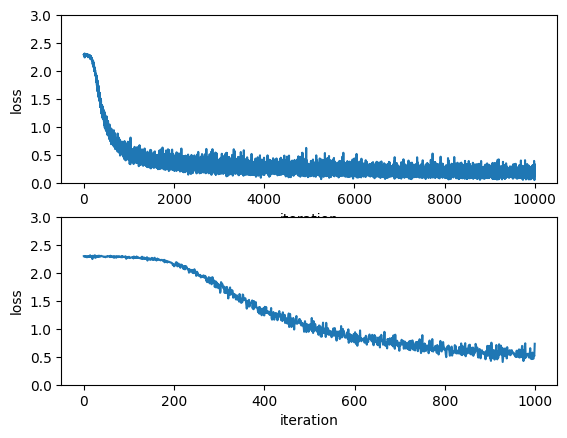

In [54]:
# 그림 4-11 손실 함수의 추이: 위쪽은 10,000회 반복까지의 추이, 아래쪽은 1,000회 반복까지의 추이
f, (ax1, ax2) = plt.subplots(2, 1)
x = np.array(range(iters_num))
ax1.plot(x, train_loss_list, label='loss')
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss")
ax1.set_ylim(0, 3.0)
ax2.plot(x[:1000], train_loss_list[:1000], label='loss')
ax2.set_xlabel("iteration")
ax2.set_ylabel("loss")
ax2.set_ylim(0, 3.0)

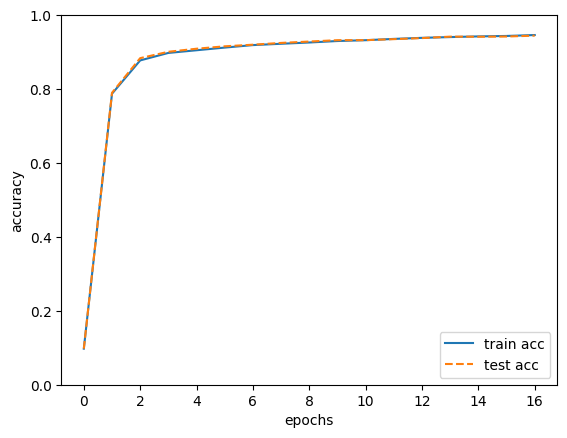

In [55]:
# 그림 4-12 훈련 데이터와 시험 데이터에 대한 정확도 추이
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()